In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
goi_id = [
         'ENSG00000141905', #NFIC
         'ENSG00000185811', #IKZF1
         'ENSG00000100811', #YY1
         'ENSG00000143437', #ARNT
         'ENSG00000120837', #NFYB
         'ENSG00000115966', #ATF2
         'ENSG00000185591', #SP1
         'ENSG00000170345', #FOS
         'ENSG00000118260', #CREB1
         'ENSG00000028277', #POU2f2
         'ENSG00000112592', #TBP
         'ENSG00000103495', #MAZ
         'ENSG00000101076', #HNF4A
         'ENSG00000175745', #NR2F1
         'ENSG00000126561', #STAT5A
         'ENSG00000120690', #ELF1
         'ENSG00000179348', #GATA2
         'ENSG00000068305', #MEF2A
         'ENSG00000173039', #RELA
         'ENSG00000066336', #SPI1
         'ENSG00000131196', #NFATC1
         'ENSG00000130522', #JUND
         'ENSG00000118513', #MYB
         'ENSG00000196092', #PAX5
         'ENSG00000164330', #EBF1
         'ENSG00000172216', #CEBPB
         'ENSG00000171223', #JUNB
         'ENSG00000141568', #FOXK2
         'ENSG00000119950', #MXI1
         'ENSG00000147133', #TAF1
         'ENSG00000143373', #ZNF687
         'ENSG00000107485', #GATA3
         'ENSG00000120798', #NR2C1
         'ENSG00000175029', #CTBP2
         'ENSG00000010244', #ZNF207
         'ENSG00000168610', #STAT3
         'ENSG00000170365', #SMAD1
         'ENSG00000169375', #SIN3A
         'ENSG00000167081', #PBX3
         'ENSG00000182979', #MTA1
         'ENSG00000106462', #EZH2
         'ENSG00000148516', #ZEB1
         'ENSG00000089902', #RCOR1
         'ENSG00000143889', #HNRNPLL
         'ENSG00000112658', #SRF
         'ENSG00000069399', #BCL3
         'ENSG00000164754', #RAD21
         'ENSG00000102554', #KLF5
         'ENSG00000125952', #MAX
         'ENSG00000136997', #MYC
         'ENSG00000156273', #BACH1
         'ENSG00000171940', #ZNF217
         'ENSG00000139083', #ETV6
         'ENSG00000074266', #EED
         'ENSG00000119866', #BCL11A
         'ENSG00000104320', #NBN
         'ENSG00000100393', #EP300
         'ENSG00000140262', #TCF12
         'ENSG00000149480', #MTA2
         'ENSG00000104856', #RELB
         'ENSG00000156127', #BATF
         'ENSG00000134107', #BHLHE40
         'ENSG00000073861', #TBX21
         'ENSG00000020633', #RUNX3
         'ENSG00000100219', #XBP1
         'ENSG00000168310', #IRF2
         'ENSG00000115415', #STAT1
         'ENSG00000049768', #FOXP3
         'ENSG00000196628', #TCF4
         'ENSG00000151090', #THRB
         'ENSG00000129514', #FOXA1
         'ENSG00000181195', #PENK
         'ENSG00000091831', #ESR1
         'ENSG00000197780', #TAF13
         'ENSG00000082175', #PGR
         'ENSG00000135100', #HNF1A
         'ENSG00000143190', #POU2F1
         'ENSG00000101096', #NFATC2
         'ENSG00000186350', #RXRA
         'ENSG00000169083', #AR
         'ENSG00000128710', #HOXD10
         'ENSG00000077092', #RARB
         'ENSG00000111424', #VDR
         'ENSG00000005436', #GCFC2
         'ENSG00000123268', #ATF1
         'ENSG00000168214', #RBPJ
         'ENSG00000113580', #NR3C1
         'ENSG00000141510', #TP53
         'ENSG00000184895', #SRY
         'ENSG00000245848', #CEBPA
         'ENSG00000128709', #HOXD9
         'ENSG00000162772', #ATF3
         'ENSG00000175832', #ETV4
         'ENSG00000101412', #E2F1
         'ENSG00000140374', #ETFA
         'ENSG00000105379', #ETFB
         'ENSG00000179388', #EGR3
         'ENSG00000184937', #WT1
         'ENSG00000106546', #AHR
         'ENSG00000131759', #RARA
         'ENSG00000109320', #NFKB1
         'ENSG00000105698', #USF2
         'ENSG00000125347', #IRF1
         'ENSG00000138795', #LEF1
         'ENSG00000126767', #ELK1
         'ENSG00000138378', #STAT4
         'ENSG00000102145', #GATA1
         'ENSG00000157557', #ETS2
         'ENSG00000134954', #ETS1
         'ENSG00000004468' #CD38
        ]

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
#         i = 201 - i
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [3]:
pat = pd.read_csv('~/COMMPASS/COMMPASS/IA13/Expression Estimates - Gene Based/MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.csv')
pat = pat.set_index(pat.GENE_ID)
pat = pat.drop(columns = 'GENE_ID')
pat = pat.loc[:, pat.columns.str.endswith('1_BM') | pat.columns.str.endswith('1_PB')]

cell = pd.read_csv('HMCL66_HTSeq_GENE_Counts_v2.csv')
cell = cell.set_index(cell.Sample)
cell = cell.drop(['Sample', 'GENE_NAME'], axis = 1)

ccle = pd.read_csv('CCLE_RNAseq_genes_counts_20180929.csv')
ccle['Name'] = ccle.Name.map(lambda x : re.sub('\.\d+$', '', x))
ccle = ccle.set_index(ccle.Name)
ccle = ccle.drop(['Name', 'Description'], axis = 1)
ccle_hlt = ccle.loc[:,ccle.columns.map(lambda x : x.endswith('HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'))]

goi_names = pd.read_csv('cd138genes.csv', header = None)
goi_names = goi_names.rename({0 :'GENE_NAMES'}, axis = 1)

goi_pat = pat.loc[goi_id]
goi_pat = goi_pat.set_index(goi_names.iloc[:, 0])
goi_pat = goi_pat.T
goi_pat_log = np.log2(goi_pat)
goi_pat_log = goi_pat_log.replace(-np.inf, 0)

y_log = goi_pat_log.CD38
X_log = goi_pat_log.drop('CD38', axis = 1)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, 
                                                                    random_state=42)

<ipython-input-3-c187ce03feea>:22: RuntimeWarning: divide by zero encountered in log2
  goi_pat_log = np.log2(goi_pat)


In [4]:
params = {
    "colsample_bytree": uniform(0.5, 0.5),
    "colsample_bylevel": uniform(0.5, 0.5),
    "colsample_bynode": uniform(0.5, 0.5),
    "gamma": uniform(0, 1),
    "learning_rate": uniform(0, 1), # default 0.1 
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(100, 200), # default 100
    "subsample": uniform(0.5, 0.5)
}

In [5]:
xgb_model = xgb.XGBRegressor(n_jobs = -1, random_state = 42)

In [6]:
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=50000, refit= True,
                            scoring = "neg_mean_absolute_error", n_jobs=-1, return_train_score=True)

In [7]:
search.fit(X_log_train, y_log_train)

report_best_scores(search.cv_results_, 20)

Model with rank: 1
Mean validation score: -0.455 (std: 0.031)
Parameters: {'colsample_bylevel': 0.5658140364286011, 'colsample_bynode': 0.8078536842438382, 'colsample_bytree': 0.7051418651679482, 'gamma': 0.7909390660598336, 'learning_rate': 0.0968001207373439, 'max_depth': 2, 'n_estimators': 183, 'subsample': 0.8963379482245502}

Model with rank: 2
Mean validation score: -0.459 (std: 0.024)
Parameters: {'colsample_bylevel': 0.5841160589964545, 'colsample_bynode': 0.8369997134780408, 'colsample_bytree': 0.7104166018630336, 'gamma': 0.5377915945153631, 'learning_rate': 0.04733678880915826, 'max_depth': 5, 'n_estimators': 195, 'subsample': 0.5852857766030961}

Model with rank: 3
Mean validation score: -0.460 (std: 0.019)
Parameters: {'colsample_bylevel': 0.9566113347197502, 'colsample_bynode': 0.5397251869939234, 'colsample_bytree': 0.730636389568059, 'gamma': 0.9745713211488792, 'learning_rate': 0.05447713544859034, 'max_depth': 4, 'n_estimators': 179, 'subsample': 0.5532458131711774}



In [8]:
xgb_model_2 = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

# {'colsample_bylevel': 0.5658140364286011, 'colsample_bynode': 0.8078536842438382, 
#  'colsample_bytree': 0.7051418651679482, 'gamma': 0.7909390660598336, 
#  'learning_rate': 0.0968001207373439, 'max_depth': 2, 'n_estimators': 183, 'subsample': 0.8963379482245502}

In [9]:
xgb_model_2.fit(X_log_train, y_log_train, eval_metric = 'mae')

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method=None,
             validate_parameters=False, verbosity=None)

In [10]:
y_pred = xgb_model_2.predict(X_log_test)

In [11]:
y_pred = pd.Series(y_pred, index = y_log_test.index)

In [12]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['CD38predicted']

In [29]:
y_pred['CD38'] = y_log_test
y_pred['type'] = 'Testing Data'

In [30]:
y_pred

,CD38predicted,CD38,type
MMRF_1744_1_BM,14.432469,15.024577,Testing Data
MMRF_2437_1_BM,14.533019,13.847253,Testing Data
MMRF_1713_1_BM,14.789536,14.504385,Testing Data
MMRF_2813_1_BM,13.740827,13.825356,Testing Data
MMRF_2822_1_BM,13.185645,12.772933,Testing Data
...,...,...,...
MMRF_1648_1_BM,14.813337,15.467351,Testing Data
MMRF_2107_1_BM,14.679344,14.751230,Testing Data
MMRF_1403_1_BM,13.860812,14.279175,Testing Data
MMRF_1455_1_BM,13.246829,13.514714,Testing Data


In [20]:
y_pred_train = xgb_model_2.predict(X_log_train)

In [21]:
y_pred_train = pd.Series(y_pred_train, index = y_log_train.index)

In [22]:
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['CD38predicted']

In [25]:
y_pred_train['CD38'] = y_log_train

In [27]:
y_pred_train['type'] = 'Training Data'

In [28]:
y_pred_train

,CD38predicted,CD38,type
MMRF_2829_1_BM,13.610603,13.579552,Training Data
MMRF_1766_1_BM,15.503090,15.452627,Training Data
MMRF_2098_1_BM,13.499412,13.406869,Training Data
MMRF_2168_1_BM,14.430389,14.449020,Training Data
MMRF_2314_1_BM,15.282512,15.559377,Training Data
...,...,...,...
MMRF_1450_1_BM,14.482428,14.722861,Training Data
MMRF_1491_1_BM,14.720710,15.359955,Training Data
MMRF_2267_1_BM,14.952078,15.169377,Training Data
MMRF_2253_1_BM,14.623013,13.908674,Training Data


In [31]:
y_pred_comb = pd.concat([y_pred, y_pred_train])
y_pred_comb

,CD38predicted,CD38,type
MMRF_1744_1_BM,14.432469,15.024577,Testing Data
MMRF_2437_1_BM,14.533019,13.847253,Testing Data
MMRF_1713_1_BM,14.789536,14.504385,Testing Data
MMRF_2813_1_BM,13.740827,13.825356,Testing Data
MMRF_2822_1_BM,13.185645,12.772933,Testing Data
...,...,...,...
MMRF_1450_1_BM,14.482428,14.722861,Training Data
MMRF_1491_1_BM,14.720710,15.359955,Training Data
MMRF_2267_1_BM,14.952078,15.169377,Training Data
MMRF_2253_1_BM,14.623013,13.908674,Training Data


/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(27.149921874999997, 0.5, 'Predicted')

<Figure size 720x720 with 0 Axes>

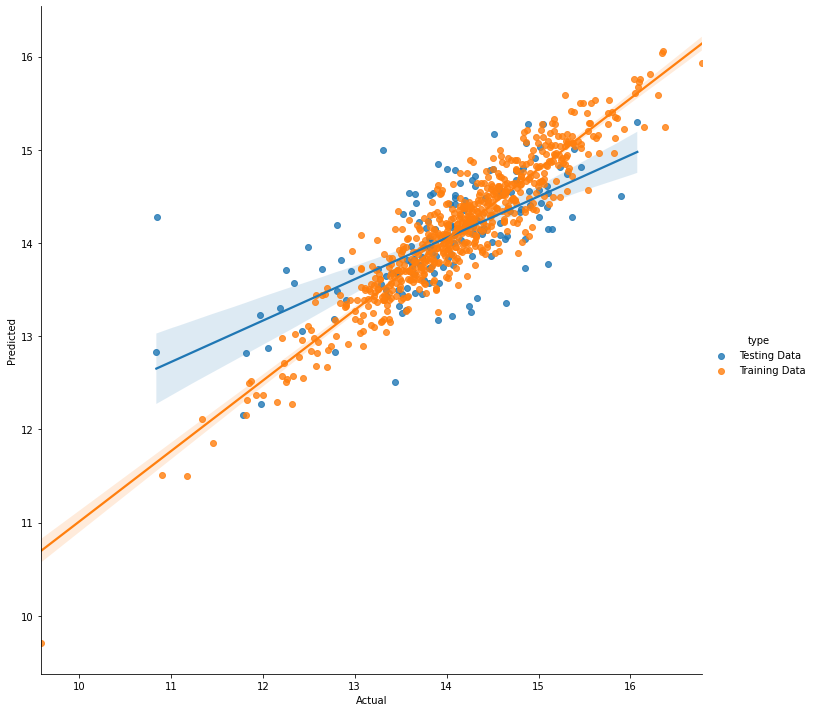

In [32]:
plt.figure(figsize=(10,10))

# plt.title("Predicted vs Actual CD38 expression levels in CoMMpass dataset (All values are Log2 Transformed FPKM)")

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'type', data = y_pred_comb, size = 10)

plt.xlabel('Actual')

plt.ylabel('Predicted')

In [65]:
mean_absolute_error(y_log_test, y_pred['CD38predicted'])

0.47631890817114436

In [33]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_model_2, random_state=1).fit(X_log_test, y_log_test)
eli5.show_weights(perm, feature_names = X_log_test.columns.tolist(), top = 100)

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.0861 ± 0.0274,XBP1
0.0428 ± 0.0209,RBPJ
0.0380 ± 0.0333,STAT1
0.0270 ± 0.0221,ATF1
0.0261 ± 0.0171,POU2F1
0.0228 ± 0.0173,ETS2
0.0190 ± 0.0316,CREB1
0.0182 ± 0.0217,FOS
0.0161 ± 0.0176,BCL3
0.0137 ± 0.0064,AHR


In [41]:
X_log[['XBP1', 'RBPJ', 'STAT1', 'ATF1', 'POU2F1', 'ETS2', 'CREB1', 'FOS', 'BCL3', 'AHR']].corrwith(y_log)

GENE_NAMES
XBP1      0.510222
RBPJ      0.422203
STAT1     0.411507
ATF1      0.499560
POU2F1    0.365196
ETS2     -0.162532
CREB1     0.464120
FOS       0.238958
BCL3     -0.157315
AHR      -0.106427
dtype: float64

In [72]:
X_log.corrwith(y_log, method = 'spearman').sort_values(ascending = False)#.to_csv('TF_corr.csv')

GENE_NAMES
ATF1       0.506228
XBP1       0.491615
GCFC2      0.468819
IRF2       0.457169
NFYB       0.448663
             ...   
BATF      -0.108888
ETS2      -0.117314
GATA2     -0.156881
BCL3      -0.170654
BHLHE40   -0.222544
Length: 109, dtype: float64

In [73]:
X_log[X_log.corrwith(y_log, method = 'spearman').sort_values(ascending = False)[:20].index]

GENE_NAMES,ATF1,XBP1,GCFC2,IRF2,NFYB,CREB1,RBPJ,TCF12,TP53,STAT1,TAF1,ATF2,EED,SP1,HNRNPLL,IKZF1,BCL11A,POU2F1,ARNT,NBN
MMRF_2801_1_BM,8.787903,14.127108,9.066089,9.292322,9.236014,11.320236,12.110157,11.625709,10.014020,11.029977,12.230921,10.743993,9.453271,10.819381,9.584963,11.168045,8.848623,11.216140,9.511753,12.115694
MMRF_2718_1_BM,10.284246,15.716337,10.225207,10.507795,10.958553,12.589651,12.651949,12.742730,11.214926,12.653741,12.647234,12.195987,11.029287,12.305207,11.037547,12.347345,12.144658,13.808864,10.900112,11.690871
MMRF_2815_1_BM,8.199672,15.021804,8.588715,7.888743,9.936638,11.603163,11.670214,11.026523,9.238405,12.536976,11.450180,10.981567,9.364135,11.682995,9.949827,12.350663,6.459432,12.014020,9.774787,11.221587
MMRF_1656_1_BM,9.799282,14.986775,9.319672,11.216140,9.912889,10.854868,11.563196,11.846666,11.263269,15.223474,11.396070,10.597121,9.946906,11.789941,10.832890,11.575066,9.645658,10.674192,11.373953,11.296343
MMRF_2461_1_BM,8.857981,15.160541,8.738092,9.079485,9.479780,10.703904,12.100334,12.020286,8.813781,13.185805,11.115044,10.745674,10.094078,11.379378,10.151017,13.006151,8.379378,11.768184,10.048487,11.432020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2795_1_BM,7.539159,14.501526,7.434628,8.607330,9.424166,10.095397,10.478770,10.832099,8.696968,10.094078,10.045760,9.583083,8.607330,8.876517,8.962896,11.437752,7.592457,10.517669,8.535275,9.202124
MMRF_2316_1_BM,9.957102,16.995281,8.939579,11.523072,10.133142,10.590587,11.219169,11.086800,10.460456,12.657988,10.230020,11.470659,10.682117,11.113742,10.460456,11.356452,10.280771,10.469642,9.228819,10.974415
MMRF_2440_1_BM,10.105909,15.760148,9.594325,11.401413,9.487840,10.746514,11.546894,11.949827,11.020286,12.288001,10.957102,10.306062,9.634811,11.142745,9.890264,12.066089,6.832890,10.664447,9.729621,11.693922
MMRF_2731_1_BM,9.738092,16.128780,10.243174,10.651052,10.153552,11.100005,12.176485,12.672646,9.727920,13.782998,10.763212,10.713387,9.236014,12.386671,10.104599,12.890264,10.412570,11.641600,11.179287,11.011926


In [74]:
xgb_model_3 = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

In [75]:
xgb_model_3.fit(X_log_train[X_l/og.corrwith(y_log, method = 'spearman').sort_values(ascending = False)[:20].index], y_log_train, eval_metric = 'mae')

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method=None,
             validate_parameters=False, verbosity=None)

In [76]:
y_pred = xgb_model_3.predict(X_log_test[X_log.corrwith(y_log, method = 'spearman').sort_values(ascending = False)[:20].index])

In [77]:
y_pred = pd.Series(y_pred, index = y_log_test.index)

In [78]:
mean_absolute_error(y_log_test, y_pred)

0.4967631687398992

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['CD38predicted']

y_pred['CD38'] = y_log_test
y_pred['type'] = 'Testing Data'

y_pred_train = xgb_model_3.predict(X_log_train[X_log.corrwith(y_log, method = 'spearman').sort_values(ascending = False)[:20].index])

y_pred_train = pd.Series(y_pred_train, index = y_log_train.index)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['CD38predicted']

y_pred_train['CD38'] = y_log_train

y_pred_train['type'] = 'Training Data'

y_pred_comb = pd.concat([y_pred, y_pred_train])

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(27.149921874999997, 0.5, 'Predicted')

<Figure size 720x720 with 0 Axes>

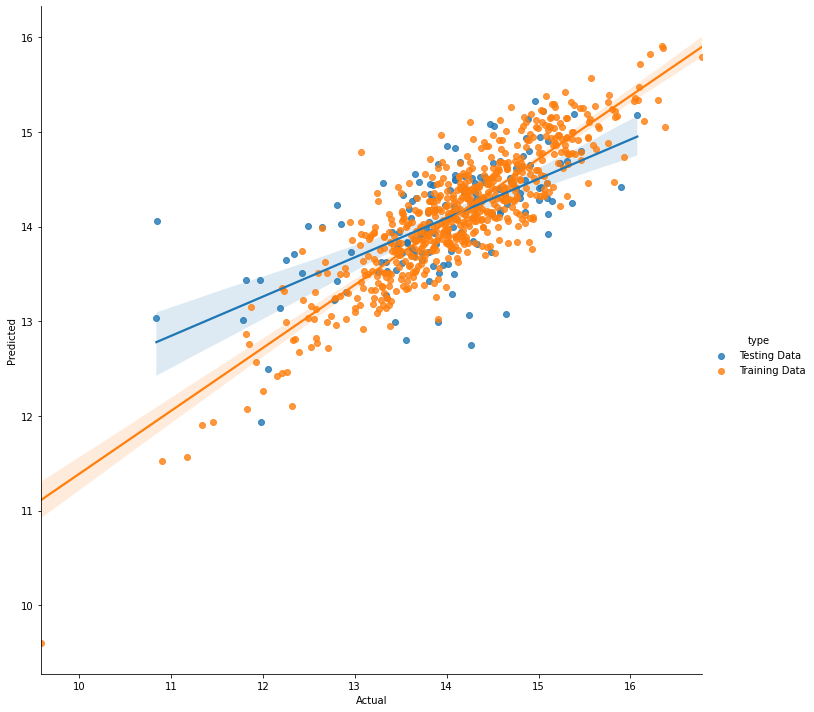

In [88]:
plt.figure(figsize=(10,10))

# plt.title("Predicted vs Actual CD38 expression levels in CoMMpass dataset (All values are Log2 Transformed FPKM)")

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'type', data = y_pred_comb, size = 10)

plt.xlabel('Actual')

plt.ylabel('Predicted')

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
regr = RandomForestRegressor(random_state=0, n_jobs = -1, criterion = 'mae')

In [97]:
regr.fit(X_log_train, y_log_train)

RandomForestRegressor(criterion='mae', n_jobs=-1, random_state=0)

In [98]:
y_pred = regr.predict(X_log_test)

In [99]:
y_pred = pd.Series(y_pred, index = y_log_test.index)

In [100]:
mean_absolute_error(y_log_test, y_pred)

0.480916512076294

In [101]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['CD38predicted']

y_pred['CD38'] = y_log_test
y_pred['type'] = 'Testing Data'

y_pred_train = regr.predict(X_log_train)

y_pred_train = pd.Series(y_pred_train, index = y_log_train.index)

y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train.columns = ['CD38predicted']

y_pred_train['CD38'] = y_log_train

y_pred_train['type'] = 'Training Data'

y_pred_comb = pd.concat([y_pred, y_pred_train])

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(27.149921874999997, 0.5, 'Predicted')

<Figure size 720x720 with 0 Axes>

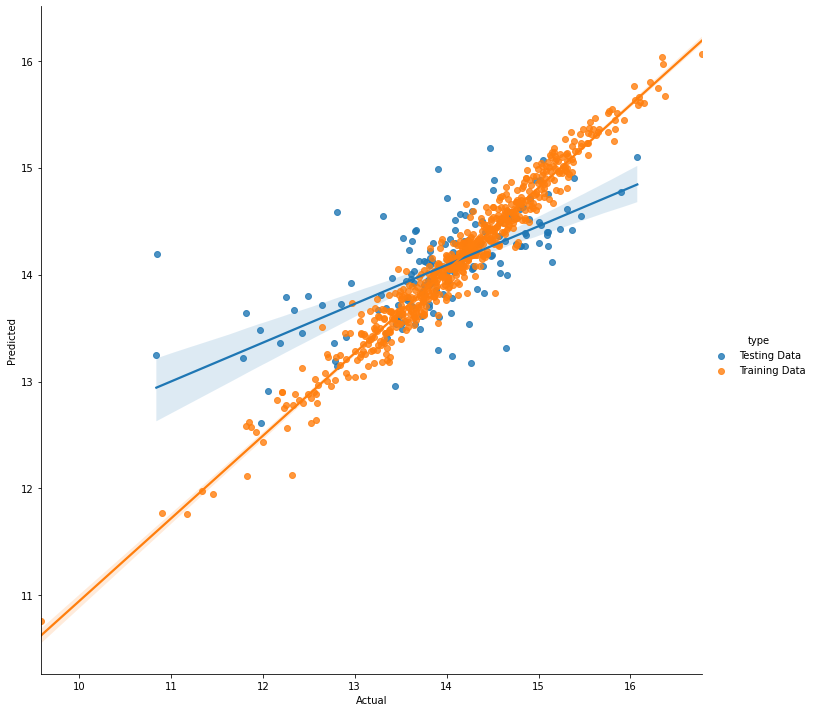

In [102]:
plt.figure(figsize=(10,10))

# plt.title("Predicted vs Actual CD38 expression levels in CoMMpass dataset (All values are Log2 Transformed FPKM)")

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'type', data = y_pred_comb, size = 10)

plt.xlabel('Actual')

plt.ylabel('Predicted')

In [ ]:
params = {
    "colsample_bytree": uniform(0.5, 0.5),
    "colsample_bylevel": uniform(0.5, 0.5),
    "colsample_bynode": uniform(0.5, 0.5),
    "gamma": uniform(0, 1),
    "learning_rate": uniform(0, 1), # default 0.1 
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.5, 0.5)
}